In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('data/cardio_dataset.csv').values

In [3]:
data=dataset[:,0:7]
target=dataset[:,7]

In [4]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainabl

In [31]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)
        
        


NameError: name 'predicted_result' is not defined

In [32]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

42/42 [==============================] - 0s 951us/step
r2 score: 0.8476873985186102


[Full details at keras official site](https://www.tensorflow.org/guide/keras/custom_callback)

In [13]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [9]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
151/167 [==========================>...] - ETA: 0s - loss: 0.0285 - mse: 0.0285 - mae: 0.1289

INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  0 - r2 score: 0.023384675605886085
167/167 [==============================] - 4s 17ms/step - loss: 0.0284 - mse: 0.0284 - mae: 0.1287 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1172
Epoch 2/200
165/167 [============================>.] - ETA: 0s - loss: 0.0238 - mse: 0.0238 - mae: 0.1179

INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  1 - r2 score: 0.043057113813540826
167/167 [==============================] - 2s 11ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1178 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1138
Epoch 3/200
155/167 [==========================>...] - ETA: 0s - loss: 0.0230 - mse: 0.0230 - mae: 0.1151

INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


42/42 [==============================] - 0s 869us/step
epoch  2 - r2 score: 0.10292296519543165
167/167 [==============================] - 2s 11ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1146 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.1121
Epoch 4/200
132/167 [======================>.......] - ETA: 0s - loss: 0.0202 - mse: 0.0202 - mae: 0.1079

INFO:tensorflow:Assets written to: models\model-004.model\assets


INFO:tensorflow:Assets written to: models\model-004.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  3 - r2 score: 0.3022719799832483
167/167 [==============================] - 2s 10ms/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1075 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.1045
Epoch 5/200
130/167 [======================>.......] - ETA: 0s - loss: 0.0164 - mse: 0.0164 - mae: 0.0938

INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


42/42 [==============================] - 0s 795us/step
epoch  4 - r2 score: 0.5711616693646069
167/167 [==============================] - 2s 13ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0929 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0757
Epoch 6/200
131/167 [======================>.......] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0822

INFO:tensorflow:Assets written to: models\model-006.model\assets


INFO:tensorflow:Assets written to: models\model-006.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  5 - r2 score: 0.6389883110468357
167/167 [==============================] - 3s 18ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0810 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0644
Epoch 7/200
132/167 [======================>.......] - ETA: 0s - loss: 0.0112 - mse: 0.0112 - mae: 0.0756

INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


42/42 [==============================] - 0s 944us/step
epoch  6 - r2 score: 0.6823786962384498
167/167 [==============================] - 2s 11ms/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0749 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0575
Epoch 8/200
134/167 [=======================>......] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0713

INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


42/42 [==============================] - 0s 760us/step
epoch  7 - r2 score: 0.7013162041306134
167/167 [==============================] - 2s 11ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0702 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0553
Epoch 9/200
152/167 [==========================>...] - ETA: 0s - loss: 0.0096 - mse: 0.0096 - mae: 0.0674

INFO:tensorflow:Assets written to: models\model-009.model\assets


INFO:tensorflow:Assets written to: models\model-009.model\assets


42/42 [==============================] - 0s 682us/step
epoch  8 - r2 score: 0.7255368217376832
167/167 [==============================] - 2s 11ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0673 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0497
Epoch 10/200
127/167 [=====================>........] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0628

INFO:tensorflow:Assets written to: models\model-010.model\assets


INFO:tensorflow:Assets written to: models\model-010.model\assets


42/42 [==============================] - 0s 664us/step
epoch  9 - r2 score: 0.7510410005862407
167/167 [==============================] - 2s 11ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0632 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0481
Epoch 11/200
161/167 [===========================>..] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0611

INFO:tensorflow:Assets written to: models\model-011.model\assets


INFO:tensorflow:Assets written to: models\model-011.model\assets


42/42 [==============================] - 0s 756us/step
epoch  10 - r2 score: 0.7572978967101323
167/167 [==============================] - 2s 14ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0613 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0502
Epoch 12/200
145/167 [=========================>....] - ETA: 0s - loss: 0.0077 - mse: 0.0077 - mae: 0.0600

INFO:tensorflow:Assets written to: models\model-012.model\assets


INFO:tensorflow:Assets written to: models\model-012.model\assets


42/42 [==============================] - 0s 854us/step
epoch  11 - r2 score: 0.7604839884018884
167/167 [==============================] - 2s 13ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0599 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0523
Epoch 13/200
164/167 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0580

INFO:tensorflow:Assets written to: models\model-013.model\assets


INFO:tensorflow:Assets written to: models\model-013.model\assets


42/42 [==============================] - 0s 476us/step
epoch  12 - r2 score: 0.7669707442102213
167/167 [==============================] - 2s 14ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0580 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0427
Epoch 14/200
136/167 [=======================>......] - ETA: 0s - loss: 0.0071 - mse: 0.0071 - mae: 0.0570

INFO:tensorflow:Assets written to: models\model-014.model\assets


INFO:tensorflow:Assets written to: models\model-014.model\assets


42/42 [==============================] - 0s 762us/step
epoch  13 - r2 score: 0.7866444001894586
167/167 [==============================] - 2s 12ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0567 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0419
Epoch 15/200
42/42 [==============================] - 0s 864us/steposs: 0.0069 - mse: 0.0069 - mae: 0.05
epoch  14 - r2 score: 0.7812641929662905
167/167 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0559 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0423
Epoch 16/200
129/167 [======================>.......] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0554

INFO:tensorflow:Assets written to: models\model-016.model\assets


INFO:tensorflow:Assets written to: models\model-016.model\assets


42/42 [==============================] - 0s 761us/step
epoch  15 - r2 score: 0.7900199676002506
167/167 [==============================] - 2s 11ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0560 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0433
Epoch 17/200
159/167 [===========================>..] - ETA: 0s - loss: 0.0064 - mse: 0.0064 - mae: 0.0541

INFO:tensorflow:Assets written to: models\model-017.model\assets


INFO:tensorflow:Assets written to: models\model-017.model\assets


42/42 [==============================] - 0s 762us/step
epoch  16 - r2 score: 0.7956519120492909
167/167 [==============================] - 2s 11ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0542 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0456
Epoch 18/200
42/42 [==============================] - 0s 762us/steposs: 0.0064 - mse: 0.0064 - mae: 0.05
epoch  17 - r2 score: 0.7795376053745038
167/167 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0535 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0406
Epoch 19/200
159/167 [===========================>..] - ETA: 0s - loss: 0.0061 - mse: 0.0061 - mae: 0.0522

INFO:tensorflow:Assets written to: models\model-019.model\assets


INFO:tensorflow:Assets written to: models\model-019.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  18 - r2 score: 0.8053148746763861
167/167 [==============================] - 3s 18ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0524 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0430
Epoch 20/200
42/42 [==============================] - 0s 1ms/step loss: 0.0060 - mse: 0.0060 - mae: 0.05
epoch  19 - r2 score: 0.7962615237781732
167/167 [==============================] - 0s 3ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0513 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0420
Epoch 21/200
42/42 [==============================] - 0s 865us/steposs: 0.0060 - mse: 0.0060 - mae: 0.05
epoch  20 - r2 score: 0.8033961379892715
167/167 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0517 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0462
Epoch 22/200
167/167 [==============================] - ETA: 0s - loss: 0.0060 - mse: 0.0060 - mae: 0.0522

INFO:tensorflow:Assets written to: models\model-022.model\assets


INFO:tensorflow:Assets written to: models\model-022.model\assets


42/42 [==============================] - 0s 878us/step
epoch  21 - r2 score: 0.8086195279282985
167/167 [==============================] - 2s 13ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0522 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0401
Epoch 23/200
42/42 [==============================] - 0s 1ms/step loss: 0.0056 - mse: 0.0056 - mae: 0.05
epoch  22 - r2 score: 0.80456331517309
167/167 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0503 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0395
Epoch 24/200
131/167 [======================>.......] - ETA: 0s - loss: 0.0060 - mse: 0.0060 - mae: 0.0512

INFO:tensorflow:Assets written to: models\model-024.model\assets


INFO:tensorflow:Assets written to: models\model-024.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  23 - r2 score: 0.8189552079200424
167/167 [==============================] - 2s 14ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0505 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0410
Epoch 25/200
42/42 [==============================] - 0s 902us/steposs: 0.0057 - mse: 0.0057 - mae: 0.04
epoch  24 - r2 score: 0.8017877713797605
167/167 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0498 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0404
Epoch 26/200
42/42 [==============================] - 0s 965us/steposs: 0.0055 - mse: 0.0055 - mae: 0.04
epoch  25 - r2 score: 0.8149181044227491
167/167 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0491 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0392
Epoch 27/200
42/42 [==============================] - 0s 989us/steposs: 0.0055 - mse: 0.0055 - mae: 0.04
epoch  26 - r2 score: 0.8162880263152444
167/167 

INFO:tensorflow:Assets written to: models\model-029.model\assets


INFO:tensorflow:Assets written to: models\model-029.model\assets


42/42 [==============================] - 0s 884us/step
epoch  28 - r2 score: 0.8245869031605242
167/167 [==============================] - 2s 11ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0485 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0388
Epoch 30/200
128/167 [=====================>........] - ETA: 0s - loss: 0.0054 - mse: 0.0054 - mae: 0.0483

INFO:tensorflow:Assets written to: models\model-030.model\assets


INFO:tensorflow:Assets written to: models\model-030.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  29 - r2 score: 0.8250622288572886
167/167 [==============================] - 2s 13ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0486 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0391
Epoch 31/200
42/42 [==============================] - 0s 1ms/step loss: 0.0057 - mse: 0.0057 - mae: 0.04
epoch  30 - r2 score: 0.8096560819686499
167/167 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0486 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0403
Epoch 32/200
42/42 [==============================] - 0s 880us/steposs: 0.0054 - mse: 0.0054 - mae: 0.04
epoch  31 - r2 score: 0.8189497042861581
167/167 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0480 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0394
Epoch 33/200
42/42 [==============================] - 0s 843us/steposs: 0.0053 - mse: 0.0053 - mae: 0.04
epoch  32 - r2 score: 0.8162300036537782
167/167 

INFO:tensorflow:Assets written to: models\model-034.model\assets


INFO:tensorflow:Assets written to: models\model-034.model\assets


42/42 [==============================] - 0s 994us/step
epoch  33 - r2 score: 0.8263501624620925
167/167 [==============================] - 2s 11ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0379
Epoch 35/200
128/167 [=====================>........] - ETA: 0s - loss: 0.0053 - mse: 0.0053 - mae: 0.0479

INFO:tensorflow:Assets written to: models\model-035.model\assets


INFO:tensorflow:Assets written to: models\model-035.model\assets


42/42 [==============================] - 0s 837us/step
epoch  34 - r2 score: 0.8271112255292055
167/167 [==============================] - 2s 11ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0476 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0383
Epoch 36/200
42/42 [==============================] - 0s 1ms/step loss: 0.0051 - mse: 0.0051 - mae: 0.
epoch  35 - r2 score: 0.8144108997521667
167/167 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0376
Epoch 37/200
127/167 [=====================>........] - ETA: 0s - loss: 0.0053 - mse: 0.0053 - mae: 0.0473

INFO:tensorflow:Assets written to: models\model-037.model\assets


INFO:tensorflow:Assets written to: models\model-037.model\assets


42/42 [==============================] - 0s 950us/step
epoch  36 - r2 score: 0.8286743365052939
167/167 [==============================] - 2s 11ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0467 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0391
Epoch 38/200
42/42 [==============================] - 0s 1ms/step loss: 0.0051 - mse: 0.0051 - mae: 0.04
epoch  37 - r2 score: 0.8276118787490265
167/167 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0475 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0394
Epoch 39/200
42/42 [==============================] - 0s 1ms/step loss: 0.0051 - mse: 0.0051 - mae: 0.04
epoch  38 - r2 score: 0.8231108550136554
167/167 [==============================] - 0s 2ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0378
Epoch 40/200
130/167 [======================>.......] - ETA: 0s - loss: 0.0053 - mse: 0.0053 - mae: 0.0476

INFO:tensorflow:Assets written to: models\model-040.model\assets


INFO:tensorflow:Assets written to: models\model-040.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  39 - r2 score: 0.829807314072972
167/167 [==============================] - 2s 11ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0369
Epoch 41/200
42/42 [==============================] - 0s 988us/steposs: 0.0054 - mse: 0.0054 - mae: 0.04
epoch  40 - r2 score: 0.8217760237322971
167/167 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0384
Epoch 42/200
42/42 [==============================] - 0s 805us/steposs: 0.0050 - mse: 0.0050 - mae: 0.04
epoch  41 - r2 score: 0.80848840564047
167/167 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0468 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0378
Epoch 43/200
128/167 [=====================>........] - ETA: 0s - loss: 0.0050 - mse: 0.0050 - mae: 0.0465

INFO:tensorflow:Assets written to: models\model-043.model\assets


INFO:tensorflow:Assets written to: models\model-043.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  42 - r2 score: 0.8311826795907675
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0459 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0379
Epoch 44/200
42/42 [==============================] - 0s 990us/steposs: 0.0050 - mse: 0.0050 - mae: 0.04
epoch  43 - r2 score: 0.8215465374137704
167/167 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0457 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0407
Epoch 45/200
42/42 [==============================] - 0s 858us/steposs: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  44 - r2 score: 0.8303754497908928
167/167 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0457 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0391
Epoch 46/200
42/42 [==============================] - 0s 981us/steposs: 0.0048 - mse: 0.0048 - mae: 0.04
epoch  45 - r2 score: 0.8274615011656442
167/167 

INFO:tensorflow:Assets written to: models\model-047.model\assets


INFO:tensorflow:Assets written to: models\model-047.model\assets


42/42 [==============================] - 0s 859us/step
epoch  46 - r2 score: 0.833187568880353
167/167 [==============================] - 2s 12ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0451 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0371
Epoch 48/200
130/167 [======================>.......] - ETA: 0s - loss: 0.0050 - mse: 0.0050 - mae: 0.0460

INFO:tensorflow:Assets written to: models\model-048.model\assets


INFO:tensorflow:Assets written to: models\model-048.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  47 - r2 score: 0.833488889522761
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0456 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0369
Epoch 49/200
42/42 [==============================] - 0s 1ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.04
epoch  48 - r2 score: 0.8282645105355758
167/167 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0452 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0363
Epoch 50/200
125/167 [=====================>........] - ETA: 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0452

INFO:tensorflow:Assets written to: models\model-050.model\assets


INFO:tensorflow:Assets written to: models\model-050.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  49 - r2 score: 0.8370822883201257
167/167 [==============================] - 2s 11ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0452 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0363
Epoch 51/200
42/42 [==============================] - 0s 1ms/step loss: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  50 - r2 score: 0.8312571760167267
167/167 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0461 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0405
Epoch 52/200
42/42 [==============================] - 0s 1ms/step loss: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  51 - r2 score: 0.8338162236970971
167/167 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0456 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0365
Epoch 53/200
42/42 [==============================] - 0s 1ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.04
epoch  52 - r2 score: 0.8253090379347058
167/167 

INFO:tensorflow:Assets written to: models\model-061.model\assets


INFO:tensorflow:Assets written to: models\model-061.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  60 - r2 score: 0.8384756760559021
167/167 [==============================] - 2s 12ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0440 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0363
Epoch 62/200
42/42 [==============================] - 0s 1ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  61 - r2 score: 0.8298273558048942
167/167 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0444 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0428
Epoch 63/200
42/42 [==============================] - 0s 987us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  62 - r2 score: 0.8281555376650501
167/167 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0445 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0369
Epoch 64/200
42/42 [==============================] - 0s 734us/steposs: 0.0046 - mse: 0.0046 - mae: 0.04
epoch  63 - r2 score: 0.8338183538113142
167/167 

INFO:tensorflow:Assets written to: models\model-069.model\assets


INFO:tensorflow:Assets written to: models\model-069.model\assets


42/42 [==============================] - 0s 853us/step
epoch  68 - r2 score: 0.8385616037894976
167/167 [==============================] - 2s 12ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0433 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0358
Epoch 70/200
42/42 [==============================] - 0s 933us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  69 - r2 score: 0.8322205255889589
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0429 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0363
Epoch 71/200
42/42 [==============================] - 0s 750us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  70 - r2 score: 0.8335324555660324
167/167 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0437 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0358
Epoch 72/200
132/167 [======================>.......] - ETA: 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0438

INFO:tensorflow:Assets written to: models\model-072.model\assets


INFO:tensorflow:Assets written to: models\model-072.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  71 - r2 score: 0.8403503387408657
167/167 [==============================] - 2s 11ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0441 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0381
Epoch 73/200
42/42 [==============================] - 0s 939us/steposs: 0.0046 - mse: 0.0046 - mae: 0.04
epoch  72 - r2 score: 0.8327500007347592
167/167 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0448 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0379
Epoch 74/200
42/42 [==============================] - 0s 956us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  73 - r2 score: 0.8401862724891407
167/167 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0433 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0364
Epoch 75/200
42/42 [==============================] - 0s 1ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  74 - r2 score: 0.8393870772536055
167/167 

INFO:tensorflow:Assets written to: models\model-080.model\assets


INFO:tensorflow:Assets written to: models\model-080.model\assets


42/42 [==============================] - 0s 880us/step
epoch  79 - r2 score: 0.8419320649608901
167/167 [==============================] - 2s 11ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0431 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0366
Epoch 81/200
42/42 [==============================] - 0s 1ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  80 - r2 score: 0.8266545717488996
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0425 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0387
Epoch 82/200
42/42 [==============================] - 0s 1ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  81 - r2 score: 0.8410389369267612
167/167 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0434 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0364
Epoch 83/200
42/42 [==============================] - 0s 1ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  82 - r2 score: 0.8373488250139454
167/16

INFO:tensorflow:Assets written to: models\model-089.model\assets


INFO:tensorflow:Assets written to: models\model-089.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  88 - r2 score: 0.842800484968467
167/167 [==============================] - 2s 12ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0428 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0362
Epoch 90/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  89 - r2 score: 0.8377488893259518
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0429 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0407
Epoch 91/200
125/167 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0421

INFO:tensorflow:Assets written to: models\model-091.model\assets


INFO:tensorflow:Assets written to: models\model-091.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  90 - r2 score: 0.8441408935443172
167/167 [==============================] - 2s 12ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0421 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0363
Epoch 92/200
42/42 [==============================] - 0s 875us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  91 - r2 score: 0.8388112929422654
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0421 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0355
Epoch 93/200
42/42 [==============================] - 0s 987us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  92 - r2 score: 0.8359279622417659
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0421 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0372
Epoch 94/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  93 - r2 score: 0.8426819902094622
167/167 

INFO:tensorflow:Assets written to: models\model-103.model\assets


INFO:tensorflow:Assets written to: models\model-103.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  102 - r2 score: 0.8452147984073647
167/167 [==============================] - 2s 13ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0362
Epoch 104/200
42/42 [==============================] - 0s 898us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  103 - r2 score: 0.8414047179519725
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0418 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0375
Epoch 105/200
42/42 [==============================] - 0s 961us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  104 - r2 score: 0.844703997110869
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0426 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0357
Epoch 106/200
42/42 [==============================] - 0s 972us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  105 - r2 score: 0.8423155246150429
16

INFO:tensorflow:Assets written to: models\model-107.model\assets


INFO:tensorflow:Assets written to: models\model-107.model\assets


42/42 [==============================] - 0s 906us/step
epoch  106 - r2 score: 0.8455783518084857
167/167 [==============================] - 2s 11ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0415 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0353
Epoch 108/200
42/42 [==============================] - 0s 1ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  107 - r2 score: 0.8425687136753252
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0378
Epoch 109/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  108 - r2 score: 0.8377822455580031
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0419 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0357
Epoch 110/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  109 - r2 score: 0.841776287620762


INFO:tensorflow:Assets written to: models\model-115.model\assets


INFO:tensorflow:Assets written to: models\model-115.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  114 - r2 score: 0.8464589254823562
167/167 [==============================] - 2s 13ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0354
Epoch 116/200
42/42 [==============================] - 0s 1ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  115 - r2 score: 0.8412056338245176
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0391
Epoch 117/200
42/42 [==============================] - 0s 946us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  116 - r2 score: 0.8449955498892564
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0411 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0355
Epoch 118/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  117 - r2 score: 0.8426507240932876
1

INFO:tensorflow:Assets written to: models\model-124.model\assets


INFO:tensorflow:Assets written to: models\model-124.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  123 - r2 score: 0.8466091461504583
167/167 [==============================] - 2s 11ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0416 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0349
Epoch 125/200
42/42 [==============================] - 0s 988us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  124 - r2 score: 0.8459339333830994
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0408 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0357
Epoch 126/200
42/42 [==============================] - 0s 874us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  125 - r2 score: 0.8444413863669193
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0410 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0382
Epoch 127/200
42/42 [==============================] - 0s 883us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  126 - r2 score: 0.8427769074942583
1

INFO:tensorflow:Assets written to: models\model-143.model\assets


INFO:tensorflow:Assets written to: models\model-143.model\assets


42/42 [==============================] - 0s 804us/step
epoch  142 - r2 score: 0.8468573564130627
167/167 [==============================] - 2s 12ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0413 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0352
Epoch 144/200
42/42 [==============================] - 0s 1ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.04
epoch  143 - r2 score: 0.84435686471217
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0403 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0386
Epoch 145/200
42/42 [==============================] - 0s 850us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  144 - r2 score: 0.8412102490545904
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0407 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0359
Epoch 146/200
42/42 [==============================] - 0s 757us/steposs: 0.0039 - mse: 0.0039 - mae: 0.04
epoch  145 - r2 score: 0.8458178971905271
1

INFO:tensorflow:Assets written to: models\model-147.model\assets


INFO:tensorflow:Assets written to: models\model-147.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  146 - r2 score: 0.847349391925222
167/167 [==============================] - 2s 12ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0410 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0357
Epoch 148/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  147 - r2 score: 0.845405740093346
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0412 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0354
Epoch 149/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  148 - r2 score: 0.8403943568579302
167/167 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0406 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0395
Epoch 150/200
42/42 [==============================] - 0s 919us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  149 - r2 score: 0.8468772178579673
167/1

INFO:tensorflow:Assets written to: models\model-158.model\assets


INFO:tensorflow:Assets written to: models\model-158.model\assets


42/42 [==============================] - 0s 988us/step
epoch  157 - r2 score: 0.8482681689463001
167/167 [==============================] - 2s 13ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0410 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0353
Epoch 159/200
42/42 [==============================] - 0s 1ms/step loss: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  158 - r2 score: 0.8425802464268413
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0407 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0349
Epoch 160/200
42/42 [==============================] - 0s 1ms/step loss: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  159 - r2 score: 0.8461631617475691
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0405 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0387
Epoch 161/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039 - mae: 0.0399

INFO:tensorflow:Assets written to: models\model-161.model\assets


INFO:tensorflow:Assets written to: models\model-161.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  160 - r2 score: 0.8485040794855602
167/167 [==============================] - 3s 16ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0402 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0364
Epoch 162/200
42/42 [==============================] - 0s 810us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  161 - r2 score: 0.8482613620795604
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0406 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0366
Epoch 163/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  162 - r2 score: 0.8424435479872344
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0410 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0353
Epoch 164/200
42/42 [==============================] - 0s 899us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  163 - r2 score: 0.8406862790552311
1

INFO:tensorflow:Assets written to: models\model-168.model\assets


INFO:tensorflow:Assets written to: models\model-168.model\assets


42/42 [==============================] - 0s 823us/step
epoch  167 - r2 score: 0.8486632619070608
167/167 [==============================] - 2s 13ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0353
Epoch 169/200
42/42 [==============================] - 0s 1ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.03
epoch  168 - r2 score: 0.845772552708956
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0399 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0378
Epoch 170/200
42/42 [==============================] - 0s 871us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  169 - r2 score: 0.8414008486006385
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0407 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0351
Epoch 171/200
42/42 [==============================] - 0s 1ms/step loss: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  170 - r2 score: 0.8484535034464094


INFO:tensorflow:Assets written to: models\model-193.model\assets


INFO:tensorflow:Assets written to: models\model-193.model\assets


42/42 [==============================] - 0s 849us/step
epoch  192 - r2 score: 0.8491613208058749
167/167 [==============================] - 2s 14ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0396 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0360
Epoch 194/200
42/42 [==============================] - 0s 1ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.04
epoch  193 - r2 score: 0.8455519023945983
167/167 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0399 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0351
Epoch 195/200
42/42 [==============================] - 0s 885us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  194 - r2 score: 0.8479988106874783
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0396 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0370
Epoch 196/200
42/42 [==============================] - 0s 778us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  195 - r2 score: 0.8457887555273755

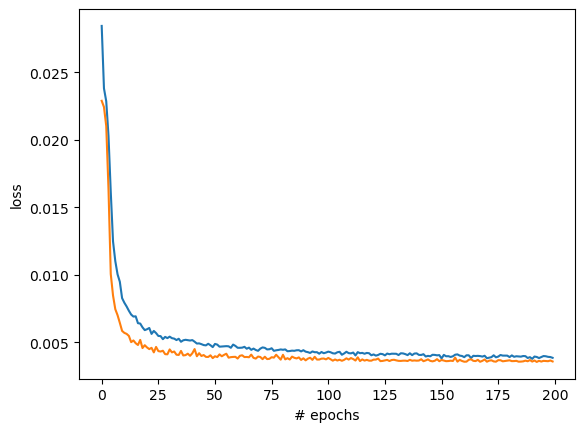

In [14]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [33]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.05158265 0.003517   0.10785463 0.03868699 0.27901524 0.27432591
  0.11840563 0.01172333 0.007034   0.38335287]]
predicted: [[0.04715577 0.0166785  0.14114821 0.06271999 0.18513197 0.37826183
  0.12288661 0.01596179 0.02159651 0.06493733]]


In [34]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 4.5  0.4  9.3  3.4 23.9 23.5 10.2  1.1  0.7 32.8]]
predicted inverse scaled: [[ 4.122387   1.5226758 12.139942   5.4500155 15.891757  32.365734
  10.582228   1.4615408  1.942182   5.6391544]]


# Save all the models

In [19]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']